## Importações

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Conhecendo a base de dados

In [3]:
desafio_v = pd.read_csv('Planilha do desafio 5 - Ciência de dados - Relatório do Banco x.csv')
desafio_v.head()

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
desafio_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Pontos          999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Bens            999 non-null    int64  
 6   Saldo na Conta  999 non-null    int64  
 7   Produto         999 non-null    int64  
 8   Possui cartao   999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


## Tratando Dados
- Substituir o cabeçalho por palavras em letras maiúsculas
- Tratar gênero
- Preencher dados faltantes com mediana
- Tratar outliers
- Verificar se existem dados duplicados

### Substituir o cabeçalho por palavras em letras maiúsculas

In [5]:
desafio_v.columns = desafio_v.columns.str.upper()
desafio_v.head()

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


### Tratando gênero

In [6]:
desafio_v.loc[desafio_v['GENERO'].isnull(), "GENERO"] = "Não Informado"
desafio_v['GENERO'].unique()

array(['Feminino', 'Masculino', 'M', 'Não Informado', 'F', 'Fem'],
      dtype=object)

In [7]:

desafio_v.loc[desafio_v['GENERO'] == "M", "GENERO"] = "Masculino"
desafio_v.loc[desafio_v['GENERO'] == "F", "GENERO"] = "Feminino"
desafio_v.loc[desafio_v['GENERO'] == "Fem", "GENERO"] = "Feminino"
desafio_v['GENERO'].unique()

array(['Feminino', 'Masculino', 'Não Informado'], dtype=object)

### Tratando Idade e Salario

In [8]:
desafio_v["IDADE"] = desafio_v["IDADE"].fillna(desafio_v["IDADE"].median())
desafio_v["SALARIO"] = desafio_v["SALARIO"].fillna(desafio_v["SALARIO"].median())

### Verificando outliers

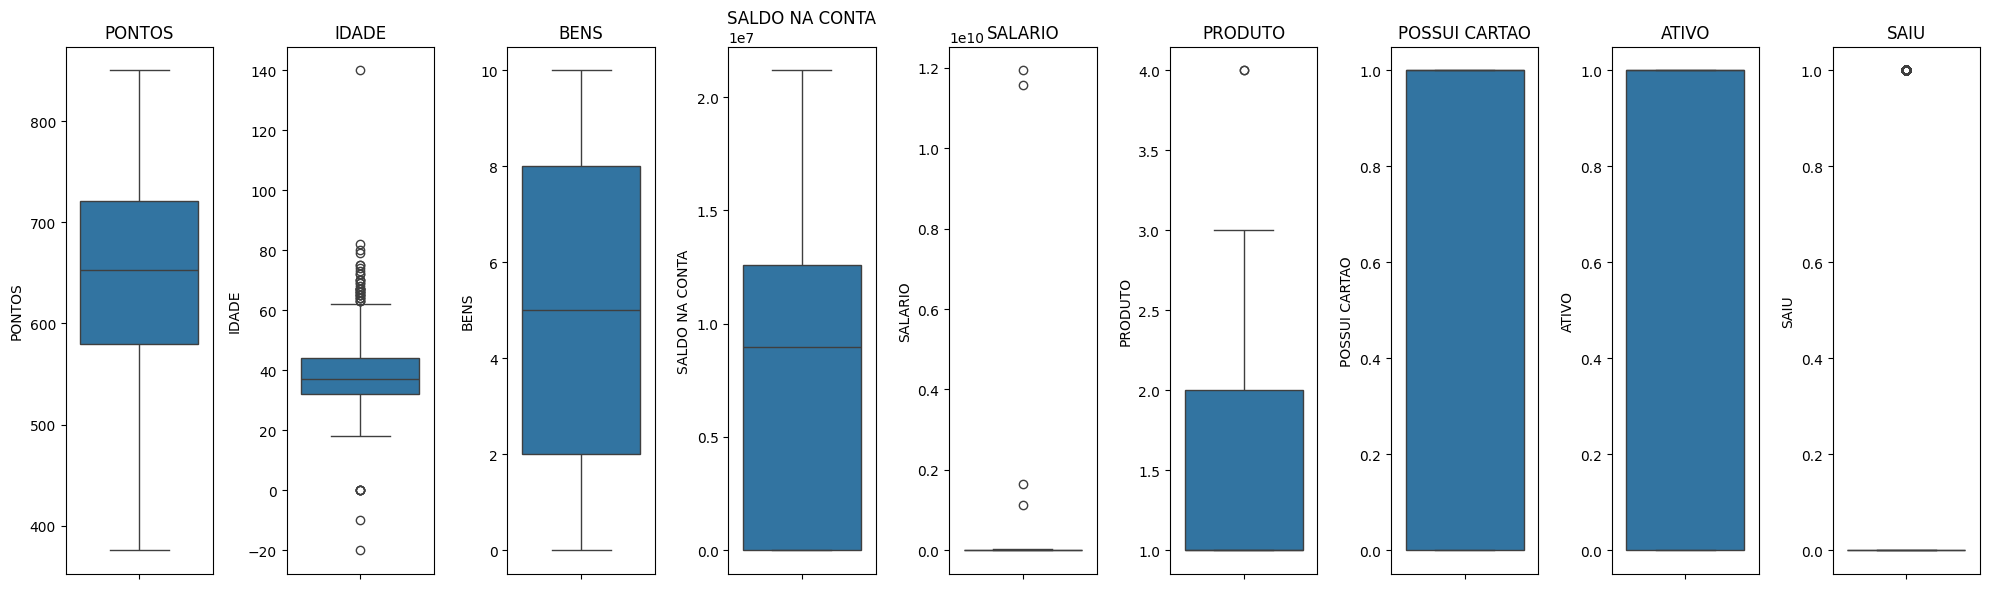

In [10]:
colunas = ['PONTOS', 'IDADE', 'BENS', 'SALDO NA CONTA', 'SALARIO', 'PRODUTO', 'POSSUI CARTAO', 'ATIVO', 'SAIU']

fig, axes = plt.subplots(nrows=1, ncols=len(colunas), figsize=(20, 6))

for ax, coluna in zip(axes, colunas):
    sns.boxplot(y=desafio_v[coluna], ax=ax)
    ax.set_title(coluna)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


#### Conclusão
Idade e salario possuem outliers

### Tratando Outliers

In [11]:
sup_sal = desafio_v['SALARIO'].quantile(0.75)
inf_sal = desafio_v['SALARIO'].quantile(0.25)
sup_ida = desafio_v['IDADE'].quantile(0.75)
inf_ida = desafio_v['IDADE'].quantile(0.25)
dif_sal = sup_sal - inf_sal
dif_ida = sup_ida - inf_ida
limite_inferior_idade = 0
limite_superior_idade = sup_ida + 1.5 * dif_ida
limite_inferior_salario = inf_sal - 1.5 * dif_sal
limite_superior_salario = sup_sal + 1.5 * dif_sal

desafio_v = desafio_v.loc[(desafio_v['IDADE'] >= limite_inferior_idade) & (desafio_v['IDADE'] <= limite_superior_idade)]
desafio_v = desafio_v.loc[(desafio_v['SALARIO'] >= limite_inferior_salario) & (desafio_v['SALARIO'] <= limite_superior_salario)]
desafio_v.head()

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


### Tratando dados duplicados

In [12]:
if desafio_v.duplicated().sum() > 0:
    desafio_v = desafio_v.drop_duplicates()
desafio_v.head()

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


## Analisando Dados

In [13]:
desafio_v['SAIU'].value_counts()

SAIU
0    765
1    193
Name: count, dtype: int64

In [14]:
desafio_v[['ESTADO', 'PONTOS', 'IDADE', 'BENS', 'SALDO NA CONTA', 'PRODUTO', 'POSSUI CARTAO', 'ATIVO', 'SALARIO', 'SAIU']].groupby('ESTADO').mean()

,PONTOS,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
ESTADO,,,,,,,,,
BA,637.857143,36.285714,5.000000,2.818841e+06,1.857143,0.571429,0.642857,8.806110e+06,0.142857
CE,651.854209,37.977413,5.106776,8.775329e+06,1.517454,0.691992,0.507187,8.988183e+06,0.246407
MA,646.647727,37.861364,5.102273,5.546515e+06,1.525000,0.725000,0.481818,8.671284e+06,0.159091
MG,658.333333,35.222222,5.666667,8.658141e+06,1.555556,0.555556,0.444444,1.082690e+07,0.000000
RJ,619.000000,40.750000,4.750000,8.668344e+06,1.500000,0.500000,1.000000,1.050755e+07,0.000000
SP,609.500000,36.250000,2.250000,1.113199e+07,1.250000,1.000000,0.500000,8.318383e+06,0.250000


In [15]:
desafio_v[['PONTOS', 'GENERO', 'IDADE', 'BENS', 'SALDO NA CONTA', 'PRODUTO', 'POSSUI CARTAO', 'ATIVO', 'SALARIO']].groupby('GENERO').mean()

,PONTOS,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO
GENERO,,,,,,,,
Feminino,647.173121,38.291572,5.025057,7.682020e+06,1.530752,0.697039,0.473804,8.831944e+06
Masculino,650.407407,37.512671,5.171540,6.811491e+06,1.522417,0.707602,0.516569,8.922579e+06
Não Informado,663.166667,38.833333,3.666667,7.322972e+06,1.333333,1.000000,0.833333,5.689186e+06


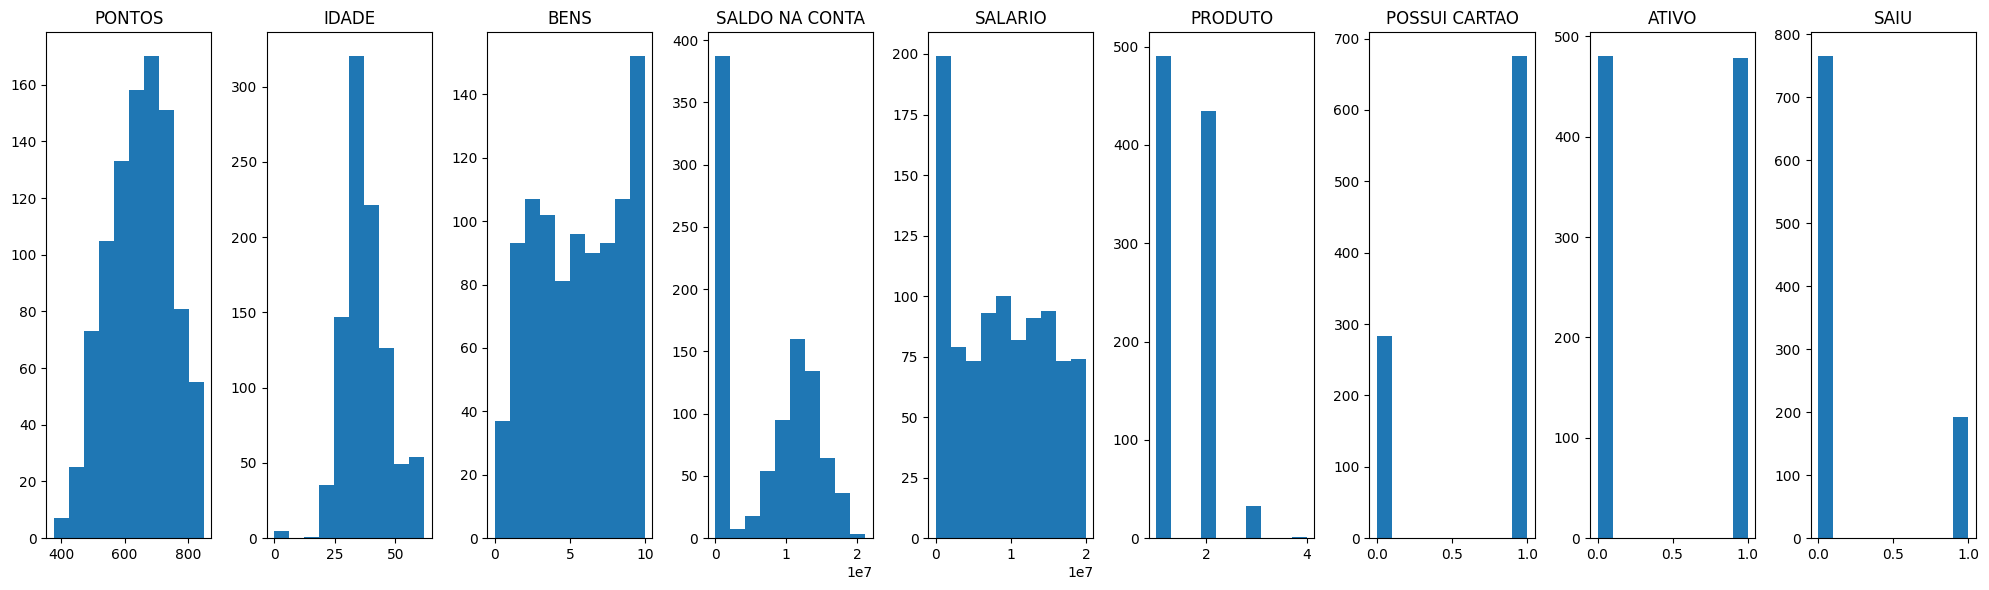

In [16]:
colunas = ['PONTOS', 'IDADE', 'BENS', 'SALDO NA CONTA', 'SALARIO', 'PRODUTO', 'POSSUI CARTAO', 'ATIVO', 'SAIU']

fig, axes = plt.subplots(nrows=1, ncols=len(colunas), figsize=(20, 6))

for ax, coluna in zip(axes, colunas):
    ax.hist(desafio_v[coluna])
    ax.set_title(coluna)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

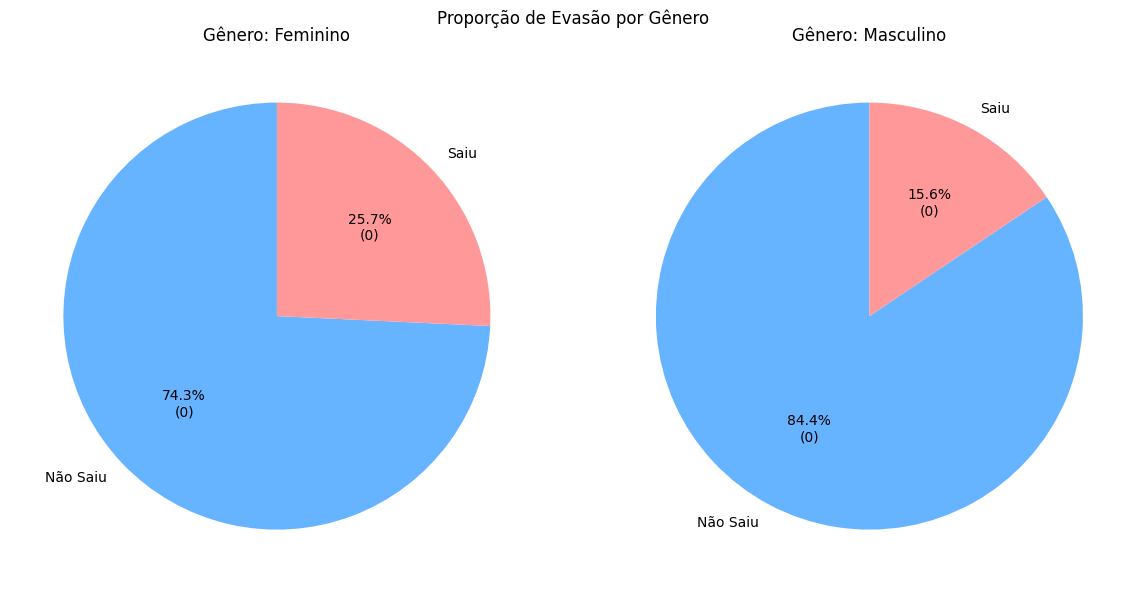

In [17]:
genero_saiu = desafio_v.groupby('GENERO')['SAIU'].value_counts(normalize=True).unstack()

def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, (genero, data) in zip(axes, genero_saiu.iterrows()):
    ax.pie(data, labels=['Não Saiu', 'Saiu'], autopct=lambda pct: func(pct, data),
           startangle=90, colors=['#66b3ff', '#ff9999'])
    ax.set_title(f'Gênero: {genero}')

plt.suptitle('Proporção de Evasão por Gênero')
plt.tight_layout()
plt.show()

### Principais Insights

- Não há diferenças significativas entre os gêneros.
- A idade avançada está associada a uma maior probabilidade de abandono da conta.
- Aproximadamente 20% dos clientes abandonaram suas contas.
- Clientes menos ativos têm uma maior tendência a abandonar suas contas.
- Mulheres apresentam uma taxa de evasão maior, enquanto homens tendem a permanecer mais.
- Clientes que possuem pelo menos três produtos têm uma maior probabilidade de sair.